In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

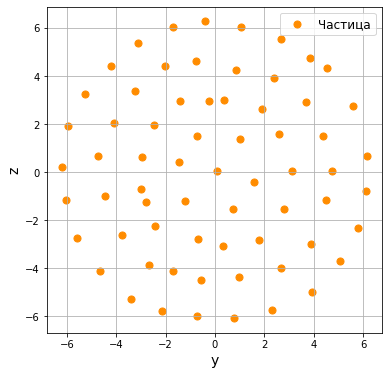

In [21]:
p = '/Users/elizavetashpilko/Documents/'
G = 500
x = np.loadtxt(p+"x_{}.txt".format(G), dtype='float64')
y = np.loadtxt(p+"y_{}.txt".format(G), dtype='float64')
z = np.loadtxt(p+"z_{}.txt".format(G), dtype='float64')
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname('/Users/elizavetashpilko/Desktop/Work/test/HCP/'))
t = -1
count = x.shape[0]
Np = x.shape[1]
a, b, c = x[t,:], y[t,:], z[t,:]
r_d = ((max(a)+max(b)+max(c))/3.0)/(Np**(1/3.))
# print(r_d)
# r_d = np.mean(np.sort(np.sqrt((a-a[0])**2 + (b-b[0])**2 + (c-c[0])**2))[1:4])
# print(r_d, np.sort(np.sqrt((a-a[0])**2 + (b-b[0])**2 + (c-c[0])**2))[1:16])

fig = plt.figure(1, figsize=(6, 6))
plt.scatter(a[(np.abs(c)<r_d)], b[(np.abs(c)<r_d)], s=50, c='darkorange', label='Частица')
plt.xlabel('y',fontsize=14)
plt.ylabel('z',fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('t = {}, N = {}.png'.format(t, 335))

In [2]:
def Radial_new(l, start):
    N = 200
    R = Np**(1/3.) * 2
    h = R / N
    x_r = np.arange(N) * h + h/2.
    y_r = np.zeros((N, int((count-start )/l + 1)))
#     x0, y0, z0 = np.mean(x[start:,:]), np.mean(y[start:,:]), np.mean(z[start:,:])
    x0, y0, z0 = 0., 0., 0.
    for k in range(start,count, l):
        s = int((k - start)/l)
        for i in range(Np):
            r = np.sqrt((x[k,i]-x0)**2 + (y[k,i]-y0)**2 + (z[k,i]-z0)**2)
            if (r < R):
#             j = int(np.sqrt(np.mean((x[k:k+l,i]-x0)**2 + (y[k:k+l,i]-y0)**2 + (z[k:k+l,i]-z0)**2,axis=0)) / h)
                j = int(r / h)
                y_r[j,s] = y_r[j,s] + 1
        
    y_rad = np.mean(y_r, axis=1)
    for j in range(N):
        y_rad[j] = y_rad[j]/(3 * h * ((j+1) * h)**2)
    return x_r, y_rad

In [3]:
def Radial(num_0,l, start):
    N = 200
    R = Np**(1/3.) * 2
    h = R / N
    x_r = np.arange(N)*h + h/2.
    y_r = np.zeros((N, int((count-start )/l + 1)))
    for k in range(start,count, l):
        s = int((k - start)/l)
        for i in range(Np):
            r = np.sqrt((x[k,i]-x[k,num_0])**2 + (y[k,i]-y[k,num_0])**2 + (z[k,i]-z[k,num_0])**2)
            if (i!=num_0) and (r < R):
                j = int(r / h)
                y_r[j,s] = y_r[j,s] + 1
        
    y_rad = np.mean(y_r, axis=1)
    for j in range(N):
        y_rad[j] = y_rad[j]/(3 * h * ((j+1) * h)**2)
        
    return x_r, y_rad

In [7]:
G_date = np.arange(10,210,10)
G_date = np.append(G_date, [250, 500])
# G_date = np.array([500])
header = ['x']
for i in (G_date):
    header.append('Г={}'.format(i))
print(len(header))
for N in [1075]:
    print(N)
    for l in [1]:
        x_, y_ = np.array([]), np.array([])
        x_new, y_new = np.array([]), np.array([])
        for i,G in enumerate(G_date):
            p = '/Users/elizavetashpilko/Desktop/Work/test/HCP/N='+str(N)+'/0/' + str(G)+'/'
#             plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname('/Users/elizavetashpilko/Desktop/Work/test/HCP/'))

            x = np.loadtxt(p+"x_{}.txt".format(G), dtype='float64')
            y = np.loadtxt(p+"y_{}.txt".format(G), dtype='float64')
            z = np.loadtxt(p+"z_{}.txt".format(G), dtype='float64')

            count = x.shape[0]
            Np = x.shape[1]
            start = 2000
            k = np.argmin(np.mean(x[start:,:]**2 + y[start:,:]**2 + z[start:,:]**2, axis=0))

            x_r_new, y_r_new = Radial(k, l, start)
#             x_r, y_r = Radial(k, l, start)
#             x_, y_ = np.append(x_, x_r), np.append(y_, y_r)
            x_new, y_new = x_r_new, np.append(y_new, y_r_new)
#         print(x_new, y_new)

        x_ = np.reshape(x_, (-1, G_date.shape[0]))
        y_ = np.reshape(y_, (x_.shape))
#         Rad = G_date
#         Rad = np.append(Rad, x_new)
#         Rad = np.append(Rad, y_new)
        
#         x_new = np.reshape(x_new, (G_date.shape[0], int(x_new.shape[0]/G_date.shape[0])))
        y_new = np.reshape(y_new,  (G_date.shape[0], int(y_new.shape[0]/G_date.shape[0])))
        Rad = np.vstack((np.array(x_new),y_new))
        print(Rad.shape)
        pd.DataFrame(Rad.transpose()).to_csv('Radial central particle N={}.csv'.format(N),header=header, index=False)
#         Rad = np.reshape(Rad, (G_date.shape[0]*2+1, -1))
#         print(x_new.shape)
#         pd.DataFrame(x_new.transpose()).to_csv('Radial x.csv',index=True)
#         pd.DataFrame(y_new.transpose()).to_csv('Radial y.csv',index=True)
        
#         plt.clf()
#         plt.subplots(figsize=(15, 250),facecolor='white')
#         for i, G in enumerate(G_date):

#                 #     plt.figure(figsize=(10,50))
#             plt.subplot(G_date.shape[0],2, 2*i+1)
#             plt.plot(x_[i,:], y_[i,:], label='Центр. частица')
#                 #     plt.plot(x_new[i,:], y_new[i,:],  label='Центр масс')
#             plt.title('Г={}, Центр. частица'.format(G))
#             plt.legend()
#             plt.grid()
#                 #     plt.xlim(0,10)
#             plt.subplot(G_date.shape[0],2, 2*i+2)
#                 #     plt.plot(x_[i,s:], y_[i,s:], label='Центр. частица')
#                 #     plt.plot(x_new[i,s:], y_new[i,s:],  label='Центр масс')
#             plt.plot(x_new[i,:], y_new[i,:],  label='Центр масс')
#             plt.title('Г={}, Центр масс'.format(G))
#             plt.legend()
#             plt.grid()
#                 #     plt.xlim(0,10)
#                 #     plt.ylim(0,2)
#         plt.savefig('Radial N={} l={}.pdf'.format(N,l), bbox_inches='tight')

23
1075
(23, 200)


(199, 8)
(199, 8)


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

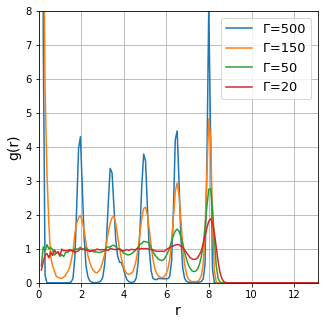

In [10]:
p = '/Users/elizavetashpilko/Desktop/Work/test/HCP/'

for N in [335, 665]:
    data = pd.read_csv(p+"Radial_{}.csv".format(N)).to_numpy()
    print(data.shape)
    plt.clf()
    plt.figure(figsize=(5,5))
    for i, G in enumerate(G_date):
        plt.plot(data[:,G_date.shape[0] - i - 1], data[:,2*G_date.shape[0] - i -1], label='Г={}'.format(G_date[G_date.shape[0] - i - 1]))
    plt.grid()
    plt.xlabel('r',fontsize=14)
    plt.ylabel('g(r)',fontsize=14)
    plt.legend(fontsize=13)
    plt.ylim(0,8)
    plt.xlim(0, N**(1./3)*1.5)
    plt.savefig('Radial_{}.png'.format(N))

In [45]:
# plt.subplots(figsize=(15, 200),facecolor='white')
# s = 7
# for i, G in enumerate(G_date):
    
# #     plt.figure(figsize=(10,50))
#     plt.subplot(G_date.shape[0],1, i+1)
#     plt.plot(x_[i,:], y_[i,:], label='Центр. частица')
#     plt.plot(x_new[i,:], y_new[i,:],  label='Центр масс')
#     plt.title('Г={}'.format(G))
#     plt.legend()
#     plt.grid()
#     plt.xlim(0,20)
    
# plt.savefig('Radial_{}_No Langevin.pdf'.format(N))

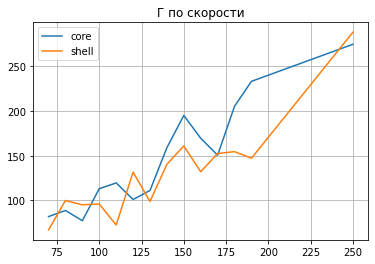

In [23]:
GV_core = np.array([])
GV_shell = np.array([])
G_date = np.arange(70,200,10)
G_date = np.append(G_date, [250])
N = 1075
start = 2000

plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname('/Users/elizavetashpilko/Work/test/HCP/'))
for i,G in enumerate(G_date):

    p = '/Users/elizavetashpilko/Work/test/HCP/N='+str(N)+'/' + str(G) + '/'
    vx = np.loadtxt(p+"v_x_{}.txt".format(G), dtype='float64')
    vy = np.loadtxt(p+"v_y_{}.txt".format(G), dtype='float64')
    vz = np.loadtxt(p+"v_z_{}.txt".format(G), dtype='float64')
    x = np.loadtxt(p+"x_{}.txt".format(G), dtype='float64')
    y = np.loadtxt(p+"y_{}.txt".format(G), dtype='float64')
    z = np.loadtxt(p+"z_{}.txt".format(G), dtype='float64')
    
    r = np.sqrt(x[start,:]**2 + y[start,:]**2 + z[start,:]**2)
    r = r[r<60]
    num = np.argsort(r)
    n_shell = num[-20:]
    n_core = num[:20]
#     print(r[n_shell], r[n_core])

    GV_core = np.append(GV_core, 3./np.mean(vx[start,n_core]**2 + vy[start,n_core]**2 + vz[start,n_core]**2))
    GV_shell = np.append(GV_shell, 3./np.mean(vx[start,n_shell]**2 + vy[start,n_shell]**2 + vz[start,n_shell]**2))
    
    
plt.plot(G_date, GV_core, label='core')
plt.plot(G_date, GV_shell, label='shell')
plt.legend()
plt.title('Г по скорости')
plt.grid()
plt.savefig('G_core_shell N={}.pdf'.format(N))

In [19]:
r[n_core], r[n_shell]

(array([0.11210599, 1.58138429, 1.65497613, 1.6969658 , 1.69869802,
        1.70582539, 1.72056089, 1.76001154, 1.78006219, 1.78404614]),
 array([6.35009168, 6.35021306, 6.35659821, 6.36233866, 6.36630982,
        6.3816309 , 6.38367335, 6.40882582, 6.41010131, 6.43430748]))

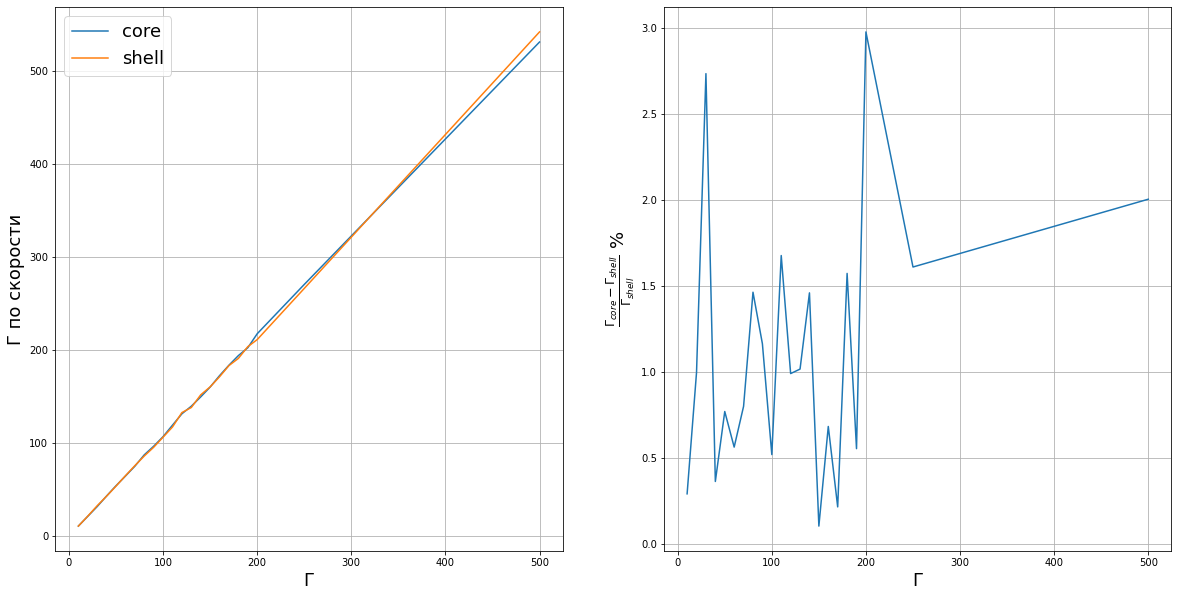

In [55]:
plt.subplots(figsize=(20, 10),facecolor='white')

plt.subplot(121)
plt.plot(G_date, GV_core, label='core')
plt.plot(G_date, GV_shell, label='shell')
plt.legend(fontsize=18)
plt.xlabel('Г', fontsize=18)
plt.ylabel('Г по скорости', fontsize=18)
plt.grid()
plt.subplot(122)
plt.plot(G_date, np.abs(GV_core-GV_shell)/GV_shell * 100)
plt.xlabel('Г', fontsize=18)
plt.ylabel('$\\frac{\Gamma_{core} - \Gamma_{shell}}{\Gamma_{shell}}$ %', fontsize=18)
plt.grid()
plt.savefig('Г по скорости N={}.pdf'.format(N))

In [56]:
# plt.subplots(figsize=(15, 200),facecolor='white')
# s = 1
# for i, G in enumerate(G_date):
    
# #     plt.figure(figsize=(10,50))
#     plt.subplot(G_date.shape[0],1,i+1)
#     plt.plot(GV[i,s:])
#     plt.title('Г={}'.format(G))
#     plt.ylabel('Г по скорости')
#     plt.xlabel('t')
#     plt.legend()
#     plt.grid()
# plt.savefig('GV_{}_No Langevin.pdf'.format(N))

In [70]:
G = 250
N = np.array([100, 147, 154, 155, 159, 335, 449, 539, 665, 763, 853, 1075])
rm_250 = np.array([])
rm_500 = np.array([])

for i in N:
    p = '/Users/elizavetashpilko/Work/test/HCP/N='+str(i)+'/'
    x = np.loadtxt(p+"x_{}.txt".format(G), dtype='float64')
    y = np.loadtxt(p+"y_{}.txt".format(G), dtype='float64')
    z = np.loadtxt(p+"z_{}.txt".format(G), dtype='float64')
    
    r = np.mean(np.sqrt(x[start:,:]**2 + y[start:,:]**2 + z[start:,:]**2), axis=0)
    num = np.argsort(r)
    n = num[0]
    rm_250 = np.append(rm_250, r[n])
    
G = 500

for i in N:
    p = '/Users/elizavetashpilko/Work/test/HCP/N='+str(i)+'/'
    x = np.loadtxt(p+"x_{}.txt".format(G), dtype='float64')
    y = np.loadtxt(p+"y_{}.txt".format(G), dtype='float64')
    z = np.loadtxt(p+"z_{}.txt".format(G), dtype='float64')
    
    r = np.mean(np.sqrt(x[start:,:]**2 + y[start:,:]**2 + z[start:,:]**2), axis=0)
    num = np.argsort(r)
    n = num[0]
    rm_500 = np.append(rm_500, r[n])

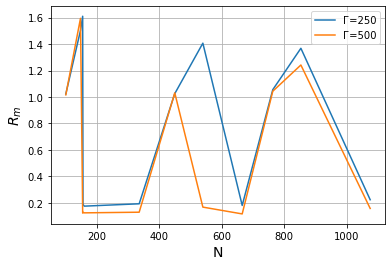

In [71]:
plt.plot(N, rm_250, label='Г=250')
plt.plot(N, rm_500, label='Г=500')
plt.xlabel('N', fontsize=14)
plt.ylabel('$R_m$', fontsize=14)
plt.legend()
plt.grid()
plt.savefig('Rm.pdf')